# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [29]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [30]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]


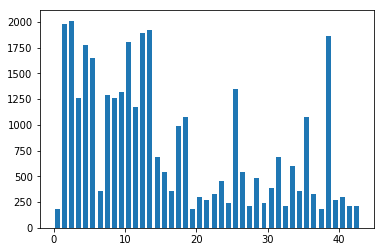

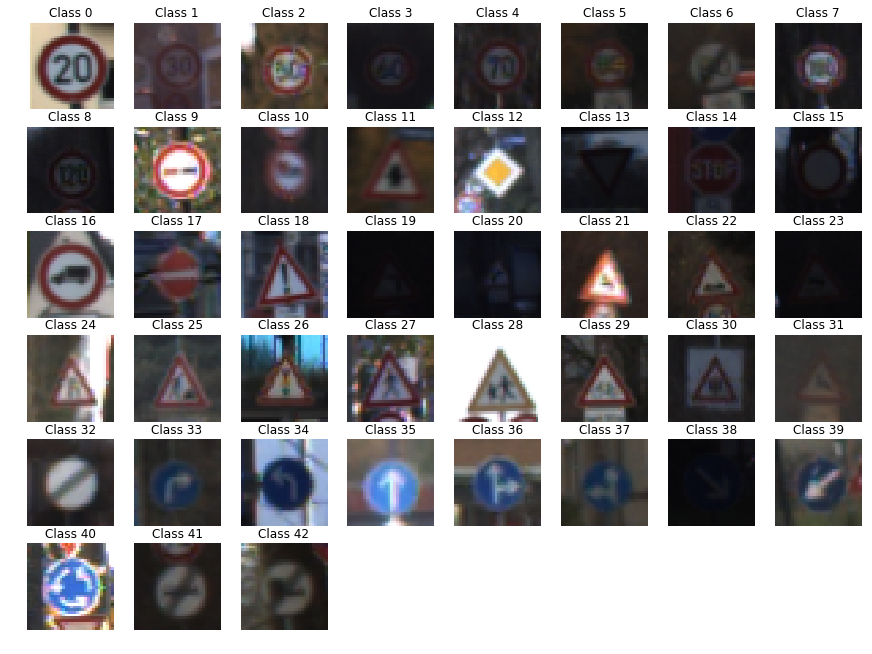

Data visualisation complete


In [31]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
# Visualizations will be shown in the notebook.
%matplotlib inline


hist, n_bins = np.histogram(y_train, range(44))
print(hist)
center = (n_bins[:-1] + n_bins[1:]) / 2
width = 0.7 * (n_bins[1] - n_bins[0])
plt.bar(center, hist, align='center', width=width)
plt.show()

plt.figure(figsize=(15, 15))

for i in range(n_classes):
    for j in range(len(y_train)):
        if (i == y_train[j]):
            plt.subplot(8, 8, i+1)
            plt.axis('off')
            plt.title("Class {0}".format(i))
            plt.imshow(X_train[j])
            break
plt.show()

print('Data visualisation complete')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [32]:
from sklearn.utils import shuffle


def preprozess( data, a=-0.5, b=0.5):
    data_max = np.max(data)
    data_min = np.min(data)
    return a + (b - a) * ((data - data_min) / (data_max - data_min))


X_train = preprozess(X_train)
X_test = preprozess(X_test)

X_valid = preprozess(X_valid)

print('Data normalized')

Data normalized


### Model Architecture

In [33]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
   
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # F_W -> (height, width, input_depth, output_depth)
    # es werden die gewichte des filters berechnet -> shape ist der des filters
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    
    # Activation.
    act1 = tf.nn.relu(conv1)

    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    pol1 = tf.nn.max_pool(act1, ksize, strides, padding='VALID')

    
    # Layer 2: Convolutional. Output = 10x10x16.
    # F_W -> (height, width, input_depth, output_depth)
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(pol1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    
    # Activation.
    act1 = tf.nn.relu(conv2)

    # TPooling. Input = 10x10x16. Output = 5x5x16.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    pol2 = tf.nn.max_pool(act1, ksize, strides, padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    flat1 = flatten(pol2)
    
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    full1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    full1_b = tf.Variable(tf.zeros(120))
    full1   = tf.matmul(flat1, full1_W) + full1_b
    
    # Activation.
    act2= tf.nn.relu(full1)

    # Add Dropout
    act2 = tf.nn.dropout(act2, keep_prob=keep_prob)

    #  Layer 4: Fully Connected. Input = 120. Output = 84.
    full2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    full_b = tf.Variable(tf.zeros(84))
    full2   = tf.matmul(act2, full2_W) + full_b
    
    # Activation.
    act3 = tf.nn.relu(full2)

    # Add Dropout
    act3 = tf.nn.dropout(act3, keep_prob=keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    full3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    full3_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(act3, full3_W) + full3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [34]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 120
learning_rate = 0.001

### Features and Labels

In [35]:
### `x` is a placeholder for a batch of input images.
### `y` is a placeholder for a batch of output labels.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32)

### Training Pipeline

In [36]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

In [37]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [38]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        if i%10 == 0 or EPOCHS <= 30:
            validation_accuracy = evaluate(X_valid, y_valid)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.543

EPOCH 2 ...
Validation Accuracy = 0.766

EPOCH 3 ...
Validation Accuracy = 0.844

EPOCH 4 ...
Validation Accuracy = 0.876

EPOCH 5 ...
Validation Accuracy = 0.890

EPOCH 6 ...
Validation Accuracy = 0.902

EPOCH 7 ...
Validation Accuracy = 0.913

EPOCH 8 ...
Validation Accuracy = 0.916

EPOCH 9 ...
Validation Accuracy = 0.930

EPOCH 10 ...
Validation Accuracy = 0.919

Model saved


### Evaluate the Model

In [39]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.911


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

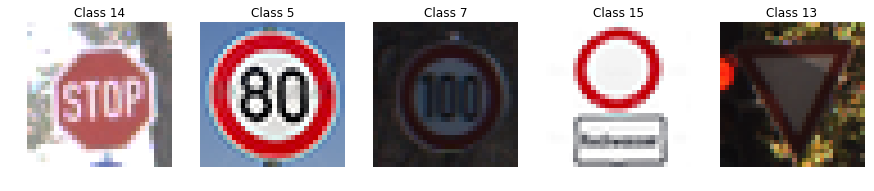

In [48]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

imgs = ['stop.png', '80.png', '100.png', 'novehicles.png', 'yield.png']

new_input_labels =[14, 5, 7, 15, 13]
images = []
new_input = []

for imgname in imgs:
    image = mpimg.imread('images/' + imgname)
    images.append(image)
    normalized_image = preprozess(image)
    new_input.append(normalized_image)
    
plt.figure(figsize=(15, 15))

for i in range(len(new_input_labels)):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("Class {0}".format(new_input_labels[i]))
    plt.imshow(images[i])
    
plt.show()


### Predict the Sign Type for Each Image

In [49]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
softmax = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    new_predictions = sess.run(softmax, feed_dict={x: new_input, keep_prob: 1})
    print(new_predictions)

[[  2.77591464e-16   3.27739652e-16   1.46569688e-17   2.14778634e-13
    5.63769843e-17   2.55745241e-13   2.06727717e-34   7.63521263e-25
    2.48666713e-20   7.03951898e-19   1.08017608e-18   2.66209668e-31
    7.13223579e-18   7.70390002e-12   1.00000000e+00   4.14028895e-10
    1.39459101e-27   7.19912574e-10   2.84218735e-24   6.94239764e-33
    2.04841618e-24   4.07317256e-31   9.77900365e-18   7.60635499e-30
    6.99725858e-30   5.25000384e-17   3.86255063e-19   8.61409595e-31
    1.30356906e-23   7.49794107e-13   2.26391631e-31   3.52270891e-25
    8.01205758e-23   1.24379083e-35   2.72445152e-35   2.39082006e-28
    2.46544717e-32   0.00000000e+00   4.35215704e-32   5.45941071e-32
    0.00000000e+00   6.46368929e-36   1.01974888e-33]
 [  3.71980695e-06   3.67929903e-03   9.77619648e-01   9.21765459e-04
    1.70541171e-06   1.77074522e-02   4.37297061e-08   6.51819064e-05
    1.10310179e-06   5.94897720e-13   4.72178991e-13   1.59966947e-15
    7.71339238e-17   2.92994101e-10 

### Analyze Performance

In [50]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    accuracy = evaluate(new_input, new_input_labels)
    print("Test Accuracy = {:.3f}".format(accuracy))

Test Accuracy = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

[[  1.00000000e+00   7.19912574e-10   4.14028895e-10]
 [  9.77619648e-01   1.77074522e-02   3.67929903e-03]
 [  9.99842763e-01   1.50475258e-04   6.45486898e-06]
 [  6.32558644e-01   3.67441416e-01   6.78921008e-09]
 [  1.00000000e+00   3.86738974e-10   7.28190945e-12]]
[[14 17 15]
 [ 2  5  1]
 [ 7  8  5]
 [13  9 41]
 [13 15 35]]


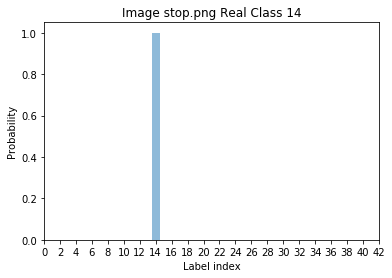

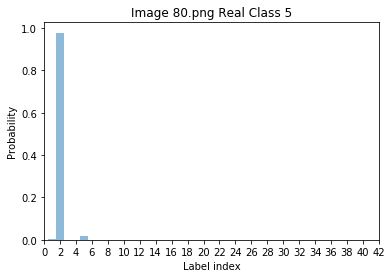

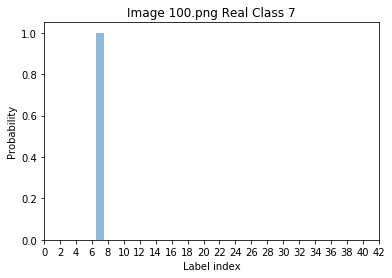

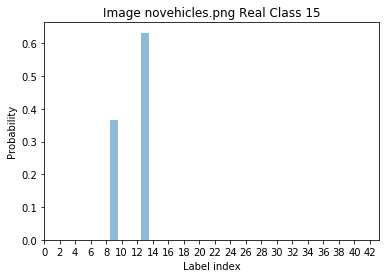

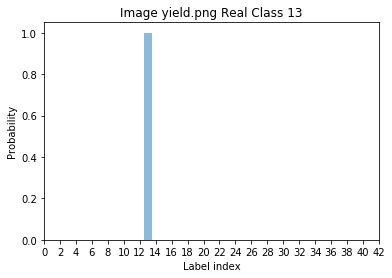

In [51]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    new_predictions = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 3), feed_dict={x: new_input, keep_prob: 1})
    print(new_predictions.values)
    print(new_predictions.indices)
    
    
for i in range(5):
    plt.bar(new_predictions[1][i], new_predictions[0][i], align="center", alpha=0.5, width = 1)
    plt.xticks(np.arange(0,44,2))
    plt.title("Image {0} Real Class {1}".format(imgs[i], new_input_labels[i]) )
    plt.ylabel("Probability")
    plt.xlabel("Label index")
    plt.show()    



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 